# **Correlation Analysis**

Step 1: Import **Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans

** Step 2: Load Your Dataset**

In [14]:
df = pd.read_csv("wipro.csv", encoding='cp1252')

In [16]:
df.head()

,Employee ID,Employee Name,Age,Gender,Marital Status,Joining Date,Company Name,Region,Tenure (in years),Job Role,...,Projects Completed,Skills,Resignation Intentions,Training Attended,Overtime Hours,Distance from Office,Employment Type,Voluntary Exit,Employment Status,Layoff Status
0,150ed17e-6582-4497-a292-624d5ec508ec,Aayush Rama,42,Female,Single,10-04-2017,Wipro,North India,14.278623,HR Manager,...,2,"Research officer, trade union",No,2,7,4.51,Full-time,Yes,Employed,No
1,9a56d871-7212-4504-89d9-a18a36c861d9,Farhan Chandran,59,Female,Single,25-08-2020,Wipro,East India,5.120704,HR Manager,...,9,Architectural technologist,No,0,4,5.30,Full-time,No,Employed,No
2,df5c4831-5039-4e73-9a41-492ba1d90701,Drishya Doshi,59,Male,Divorced,08-08-2021,Wipro,West India,3.380284,Network Engineer,...,6,Translator,No,4,24,28.77,Contract,No,Employed,No
3,e8a9e385-b755-4604-aa09-4c47432125e0,Ishaan Kurian,42,Female,Divorced,23-07-2022,Wipro,South India,10.008691,Data Analyst,...,9,"Therapist, speech and language",No,5,41,23.96,Full-time,Yes,Laid Off,No
4,55a6ea3c-1249-4156-bf29-e5fc86e7fa0e,Sana Chauhan,34,Female,Single,06-10-2020,Wipro,North India,2.672736,Project Manager,...,7,Risk manager,No,0,12,14.74,Contract,Yes,Employed,Yes


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Employee ID                    1452 non-null   object 
 1   Employee Name                  1452 non-null   object 
 2   Age                            1452 non-null   int64  
 3   Gender                         1452 non-null   object 
 4   Marital Status                 1452 non-null   object 
 5   Joining Date                   1452 non-null   object 
 6   Company Name                   1452 non-null   object 
 7   Region                         1452 non-null   object 
 8   Tenure (in years)              1452 non-null   float64
 9   Job Role                       1452 non-null   object 
 10  Department                     1452 non-null   object 
 11  Education Qualification        1452 non-null   object 
 12  Experience (in years)          1452 non-null   f

**Step 3: Compute the Correlation Matrix**

In [18]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

                                    Age  Tenure (in years)  \
Age                            1.000000           0.003598   
Tenure (in years)              0.003598           1.000000   
Experience (in years)          0.007720          -0.026619   
Performance Rating             0.000107           0.032276   
Project Contribution           0.017135          -0.006376   
Salary (Annual)                0.012910          -0.068254   
Promotions Received            0.046752           0.020606   
Working Hours Per Week        -0.060242          -0.012968   
Disciplinary Issues           -0.052753           0.023594   
Certifications Attained        0.031160           0.018247   
Absenteeism Rate              -0.052779          -0.038056   
Last Performance Review Score  0.003561           0.008060   
Projects Completed            -0.012283           0.016222   
Training Attended             -0.028462          -0.026843   
Overtime Hours                 0.006780          -0.015152   
Distance

**Step 4: Visualize the Correlation with a Heatmap**

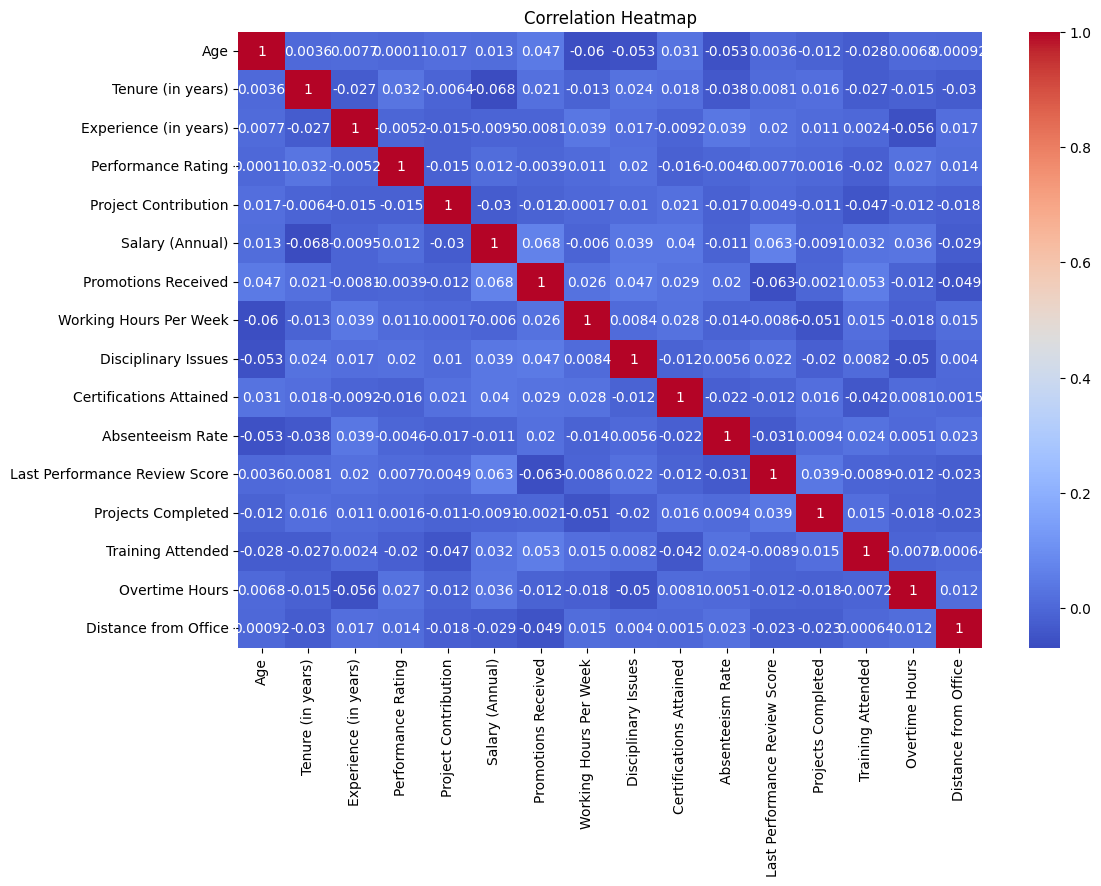

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# **Logistics Regression**

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.34      0.42       242
           1       0.46      0.68      0.55       204

    accuracy                           0.50       446
   macro avg       0.51      0.51      0.49       446
weighted avg       0.51      0.50      0.48       446



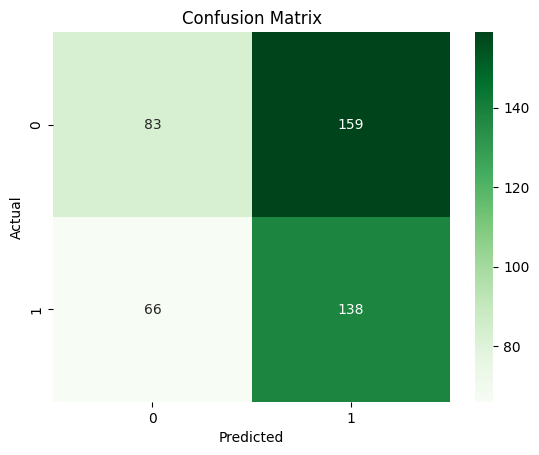

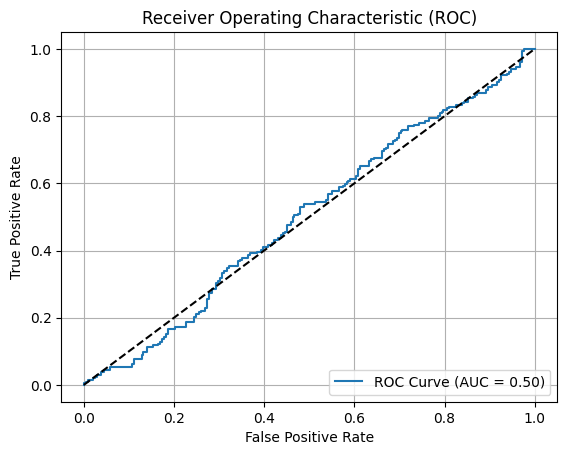

In [20]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'Marital Status', 'Region', 'Job Role', 'Department',
                       'Education Qualification', 'Previous Layoffs Experience', 'Manager Feedback',
                       'Resignation Intentions', 'Employment Type', 'Voluntary Exit',
                       'Employment Status', 'Layoff Status']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select features and target
features = ['Salary (Annual)', 'Tenure (in years)', 'Performance Rating',
            'Overtime Hours', 'Training Attended']
target = 'Resignation Intentions'

X = df[features]
y = df[target]

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# **K- Means Clustering**

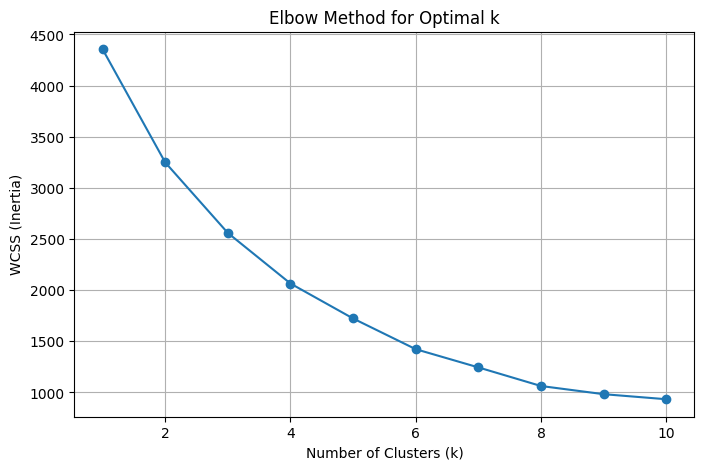

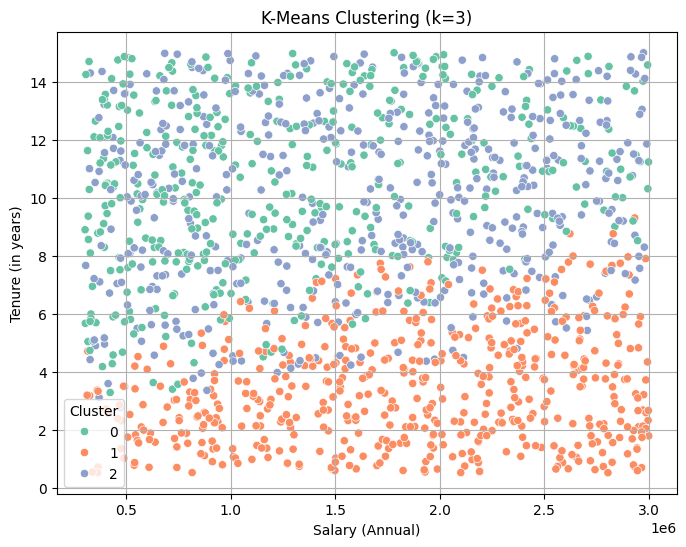

In [21]:
# Select features for clustering
features = ['Salary (Annual)', 'Performance Rating', 'Tenure (in years)']
df_cluster = df[features].copy()

# Handle missing values (if any)
df_cluster.dropna(inplace=True)

# Scale the features (important for KMeans)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)

# Elbow Method to find optimal number of clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.show()

# Apply KMeans with optimal k (e.g., k=3 based on elbow)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Salary (Annual)', y='Tenure (in years)', hue='Cluster', data=df, palette='Set2')
plt.title("K-Means Clustering (k=3)")
plt.xlabel("Salary (Annual)")
plt.ylabel("Tenure (in years)")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# **Descriptive Analysis**

Descriptive Statistics:

               Age  Salary (Annual)  Tenure (in years)  Experience (in years)  \
count  1452.000000     1.452000e+03        1452.000000            1452.000000   
mean     41.082645     1.626535e+06           7.685702              15.835531   
std      11.238597     7.806893e+05           4.177494               8.130248   
min      22.000000     3.030000e+05           0.510051               1.011314   
25%      31.000000     9.220000e+05           4.181660               8.945998   
50%      41.000000     1.619000e+06           7.692941              15.802423   
75%      51.000000     2.292000e+06          11.322117              22.816834   
max      60.000000     2.999000e+06          14.999706              29.953253   

       Overtime Hours  Absenteeism Rate  Training Attended  
count     1452.000000       1452.000000        1452.000000  
mean        24.639118          5.058547           2.451102  
std         14.528066          2.906441           1.732554  
m

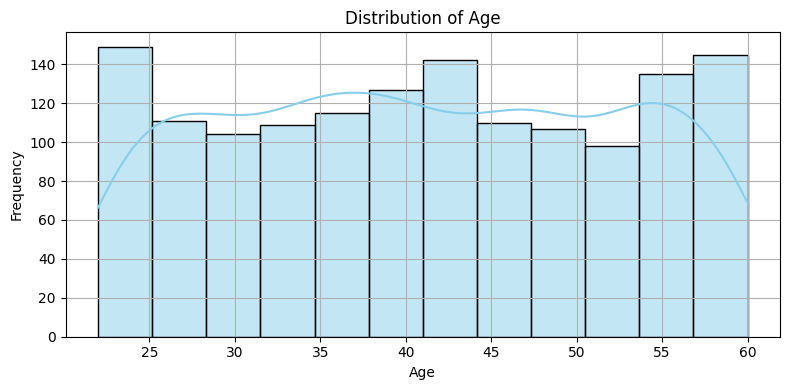

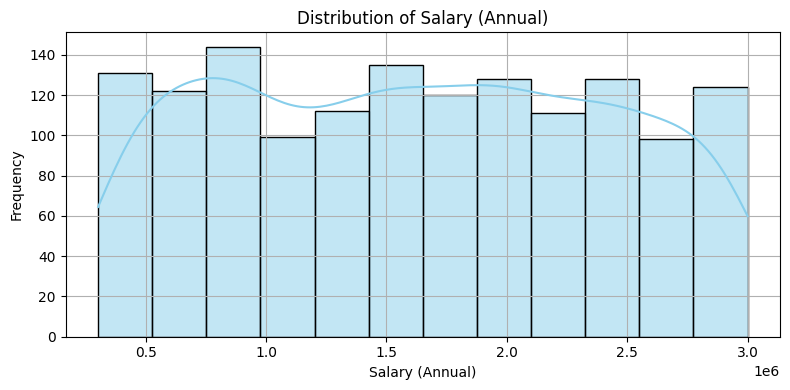

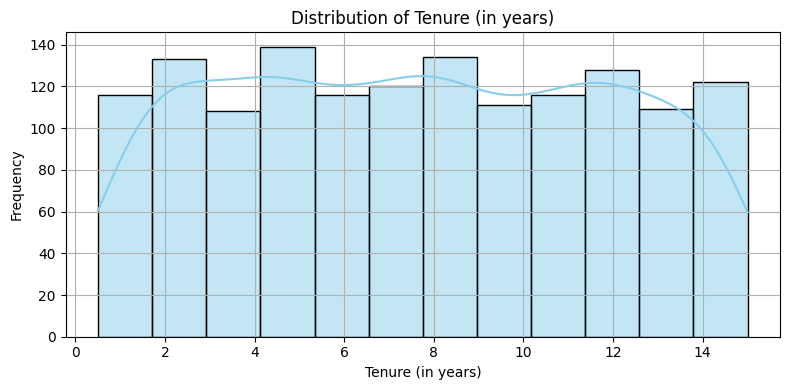

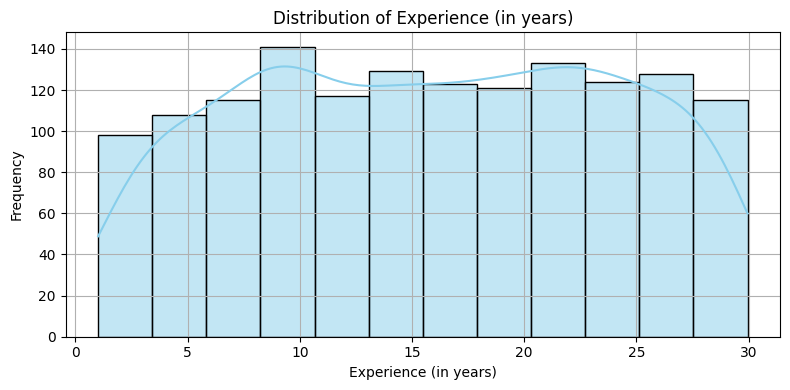

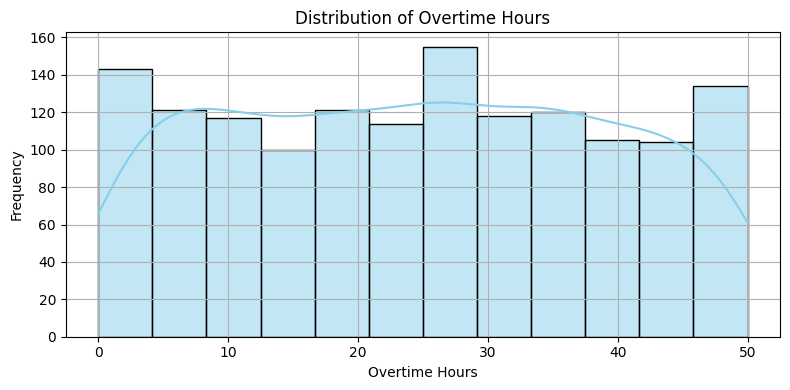

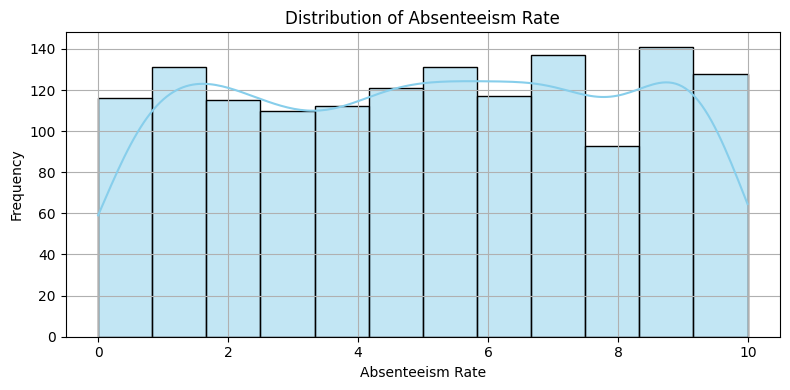

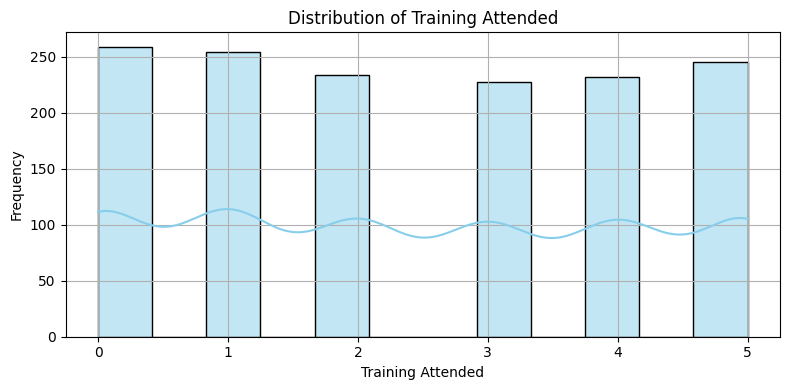

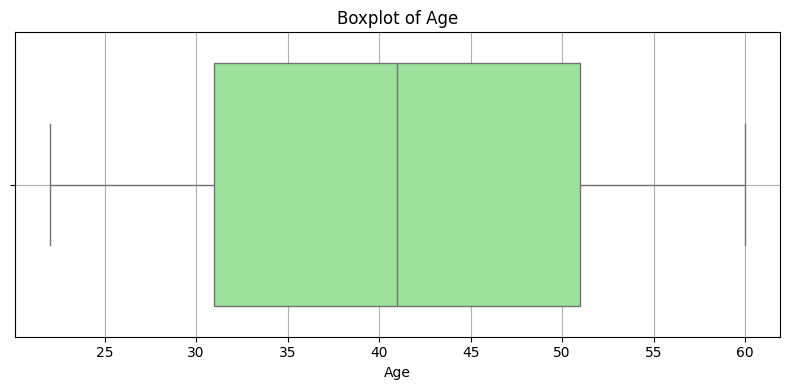

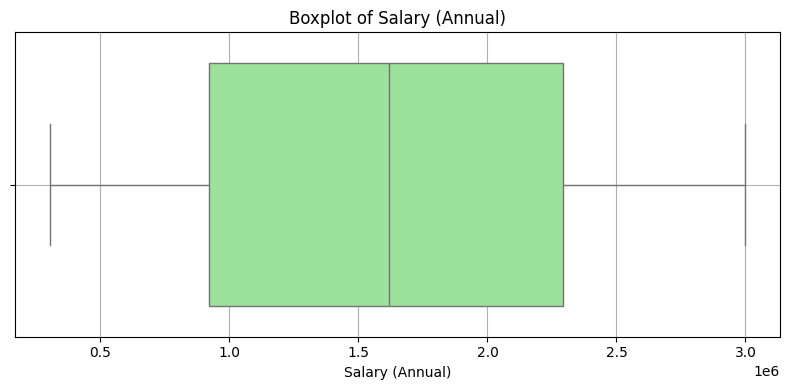

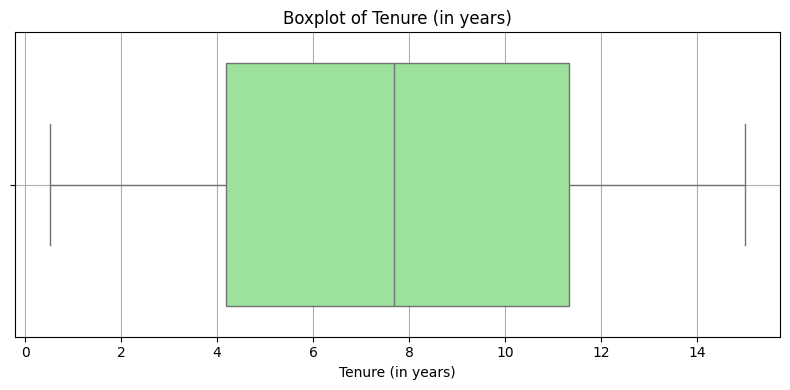

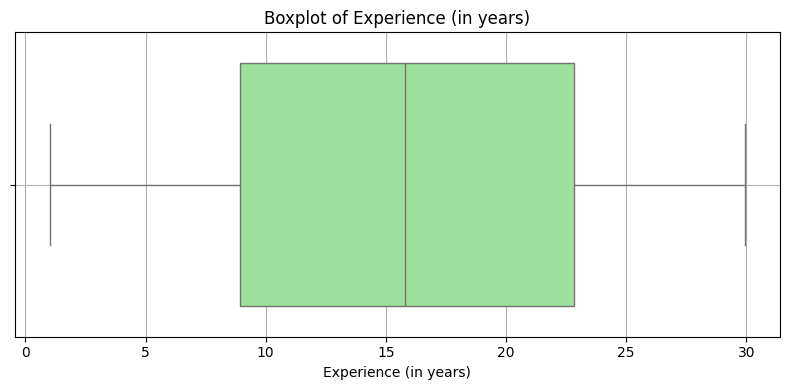

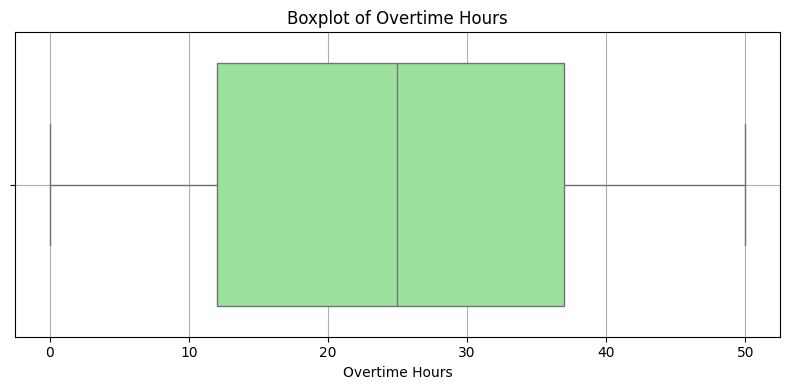

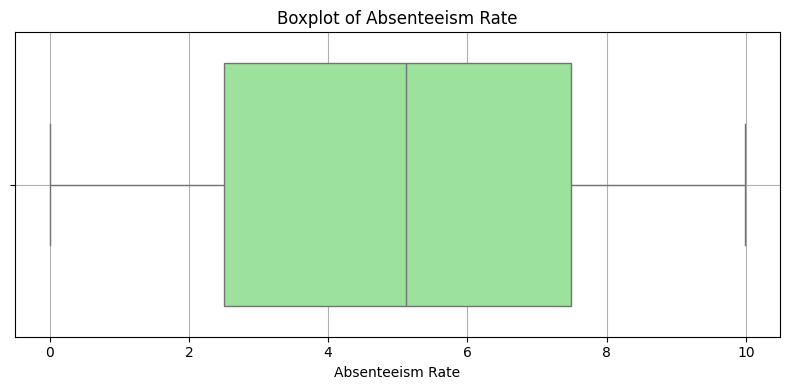

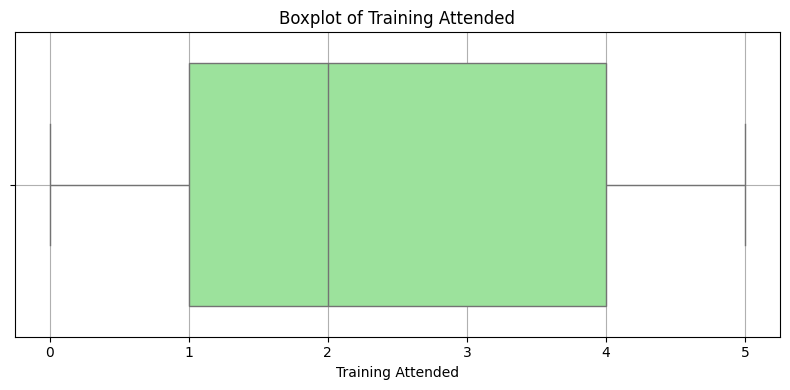

In [22]:
# Select key variables for descriptive analysis
cols = ['Age', 'Salary (Annual)', 'Tenure (in years)',
        'Experience (in years)', 'Overtime Hours',
        'Absenteeism Rate', 'Training Attended']

# Basic Descriptive Statistics
desc_stats = df[cols].describe()
print("Descriptive Statistics:\n")
print(desc_stats)

# Optional: Save to CSV
desc_stats.to_csv("descriptive_statistics_summary.csv")

# Histograms for visual insight
for col in cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Boxplots to identify outliers
for col in cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [23]:
# Create a dictionary with descriptive statistics
data = {
    "Variable": [
        "Age", "Salary (Annual)", "Tenure (in years)", "Experience (in years)",
        "Overtime Hours", "Absenteeism Rate", "Training Attended"
    ],
    "Mean": [41.08, 1626535, 7.69, 15.83, 24.64, 5.06, 2.45],
    "Median": [41, 1619000, 7.69, 15.80, 25, 5.13, 2],
    "Std. Dev": [11.24, 780689, 4.18, 8.13, 14.53, 2.91, 1.73],
    "Min": [22, 303000, 0.51, 1.01, 0, 0, 0],
    "Max": [60, 2999000, 15.00, 29.95, 50, 9.99, 5]
}

# Convert dictionary to DataFrame
descriptive_df = pd.DataFrame(data)

# Display the table
print(descriptive_df.to_string(index=False))

             Variable       Mean     Median  Std. Dev       Min        Max
                  Age      41.08      41.00     11.24     22.00      60.00
      Salary (Annual) 1626535.00 1619000.00 780689.00 303000.00 2999000.00
    Tenure (in years)       7.69       7.69      4.18      0.51      15.00
Experience (in years)      15.83      15.80      8.13      1.01      29.95
       Overtime Hours      24.64      25.00     14.53      0.00      50.00
     Absenteeism Rate       5.06       5.13      2.91      0.00       9.99
    Training Attended       2.45       2.00      1.73      0.00       5.00


In [25]:
df = pd.read_csv("wipro.csv", encoding='cp1252')

# **Political Factor**

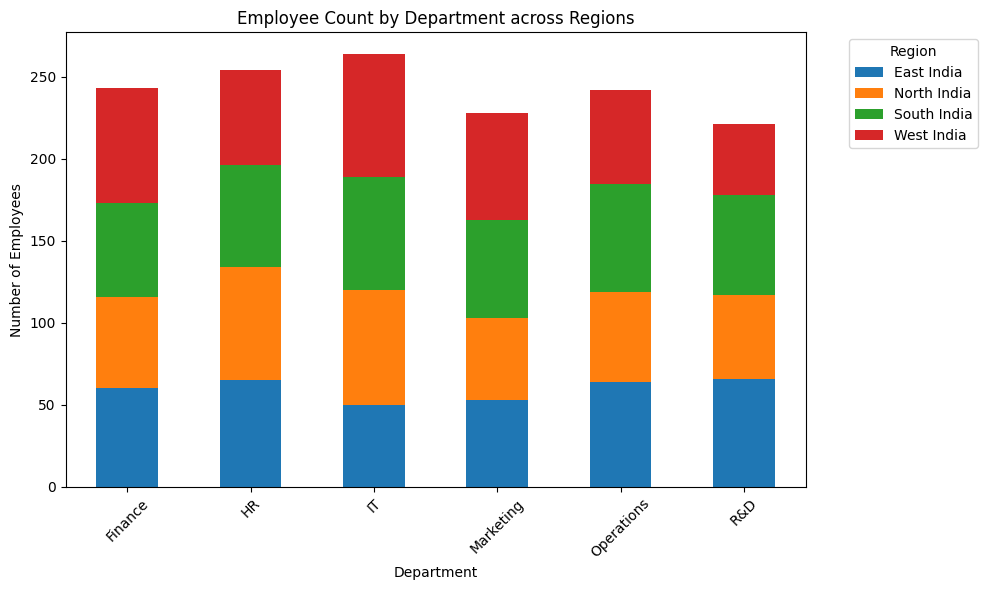

In [26]:


# Check the required columns are present
required_columns = ['Department', 'Region', 'Employee ID']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"Dataset must contain columns: {required_columns}")

# Create a pivot table: Employee count by Department and Region
pivot_table = (
    df.pivot_table(
        index="Department",
        columns="Region",
        values="Employee ID",
        aggfunc="count",
        fill_value=0
    ).sort_index()
)

# Plot: Stacked bar chart
pivot_table.plot(kind="bar", stacked=True, figsize=(10, 6))

# Customize plot
plt.title("Employee Count by Department across Regions")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

# **Economic Factor**

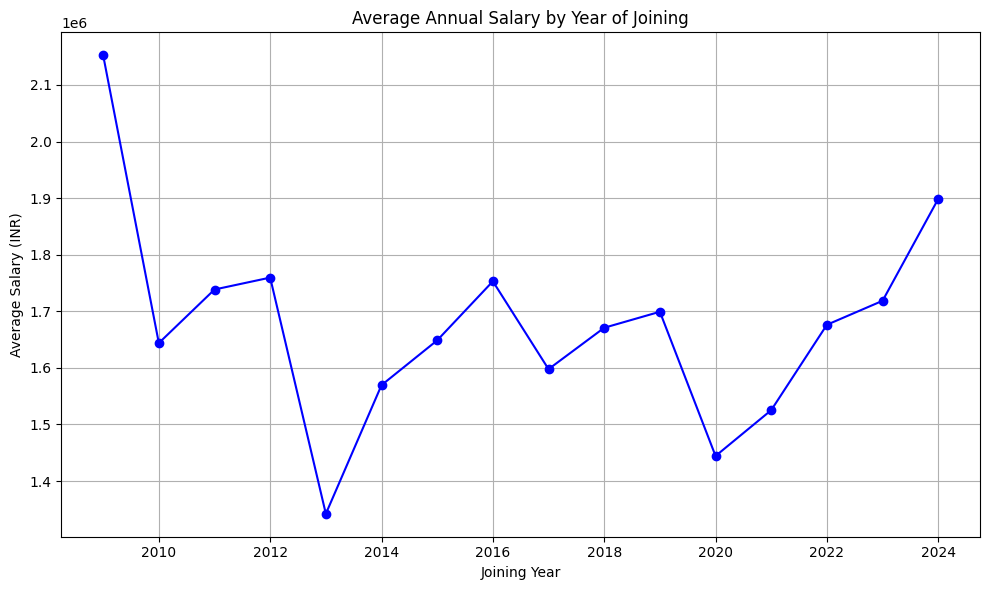

In [27]:
# Convert 'Joining Date' to datetime and extract year
df['Joining Year'] = pd.to_datetime(df['Joining Date'], errors='coerce').dt.year

# Drop rows with missing 'Joining Year' or 'Salary (Annual)'
df_cleaned = df.dropna(subset=['Joining Year', 'Salary (Annual)'])

# Group by 'Joining Year' and calculate average salary
avg_salary_by_year = df_cleaned.groupby('Joining Year')['Salary (Annual)'].mean()

# Plot: Line chart
plt.figure(figsize=(10, 6))
avg_salary_by_year.plot(kind='line', marker='o', color='blue')

# Customize the plot
plt.title("Average Annual Salary by Year of Joining")
plt.xlabel("Joining Year")
plt.ylabel("Average Salary (INR)")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# **Social Factor**

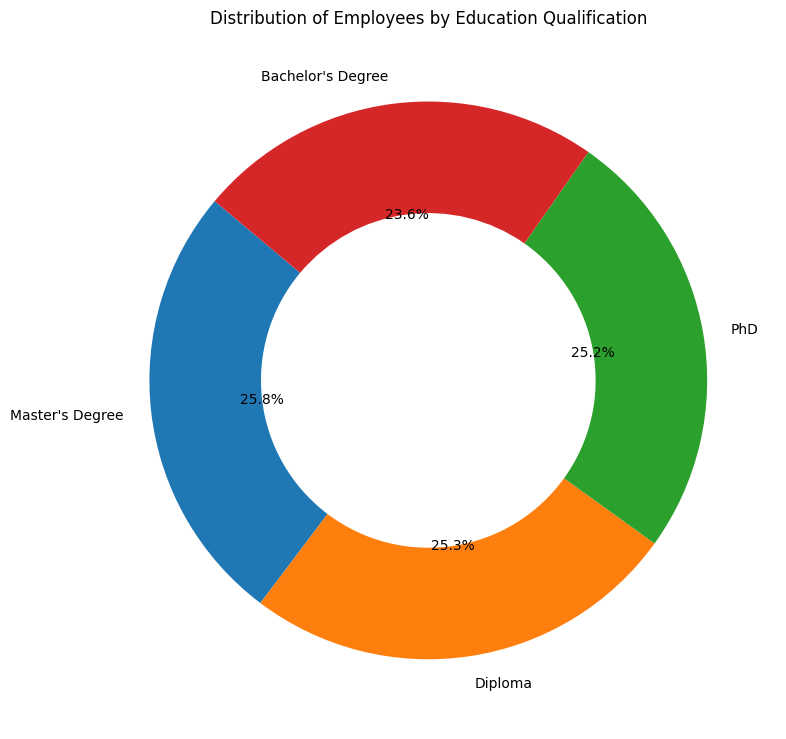

In [28]:
# Count the number of employees by education qualification
education_counts = (
    df['Education Qualification']
    .value_counts()
    .sort_values(ascending=False)
)

# Plot a donut chart (pie with a hole in the middle)
plt.figure(figsize=(8, 8))
plt.pie(
    education_counts,
    labels=education_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'width': 0.4}  # Creates the donut hole
)

# Customize the chart
plt.title("Distribution of Employees by Education Qualification")
plt.tight_layout()

# Show the chart
plt.show()

# **Technological Factor**

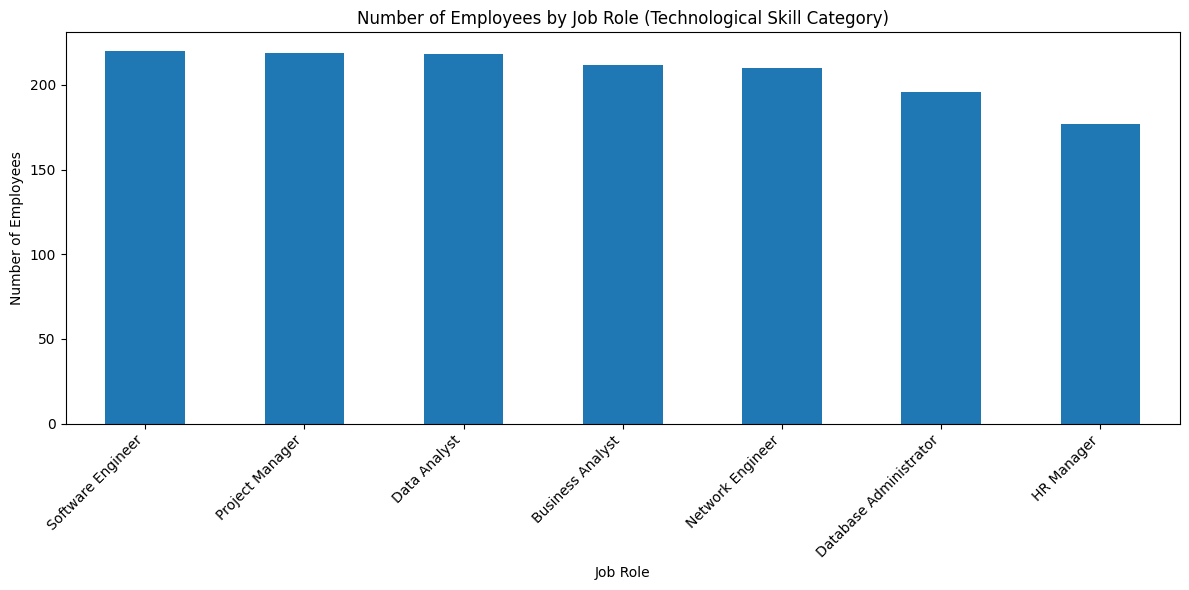

In [29]:
# Count the number of employees by Job Role (technological skill category)
job_role_counts = (
    df['Job Role']
    .value_counts()
    .sort_values(ascending=False)
)

# Plot: Clustered column chart (vertical bar chart)
plt.figure(figsize=(12, 6))
job_role_counts.plot(kind='bar')

# Customize the plot
plt.title("Number of Employees by Job Role (Technological Skill Category)")
plt.xlabel("Job Role")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the chart
plt.show()

# **Environmental Factor**

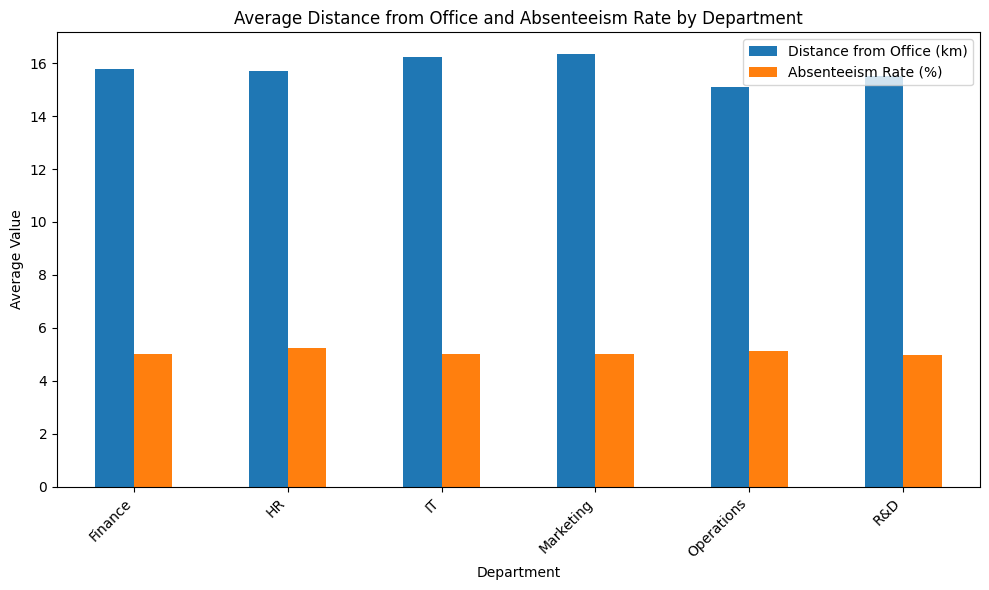

In [30]:
# Ensure required columns exist
required_cols = ['Department', 'Distance from Office', 'Absenteeism Rate']
if not all(col in df.columns for col in required_cols):
    raise ValueError(f"Dataset must contain columns: {required_cols}")

# Compute department-level averages
env_metrics = (
    df.groupby('Department')[['Distance from Office', 'Absenteeism Rate']]
    .mean()
    .sort_index()
)

# Plot: Side-by-side bars (clustered column chart)
ax = env_metrics.plot(kind='bar', figsize=(10, 6))

# Customise the plot
plt.title("Average Distance from Office and Absenteeism Rate by Department")
plt.xlabel("Department")
plt.ylabel("Average Value")
plt.xticks(rotation=45, ha='right')
plt.legend(["Distance from Office (km)", "Absenteeism Rate (%)"])
plt.tight_layout()

# Display the chart
plt.show()

# **Legal Factor**

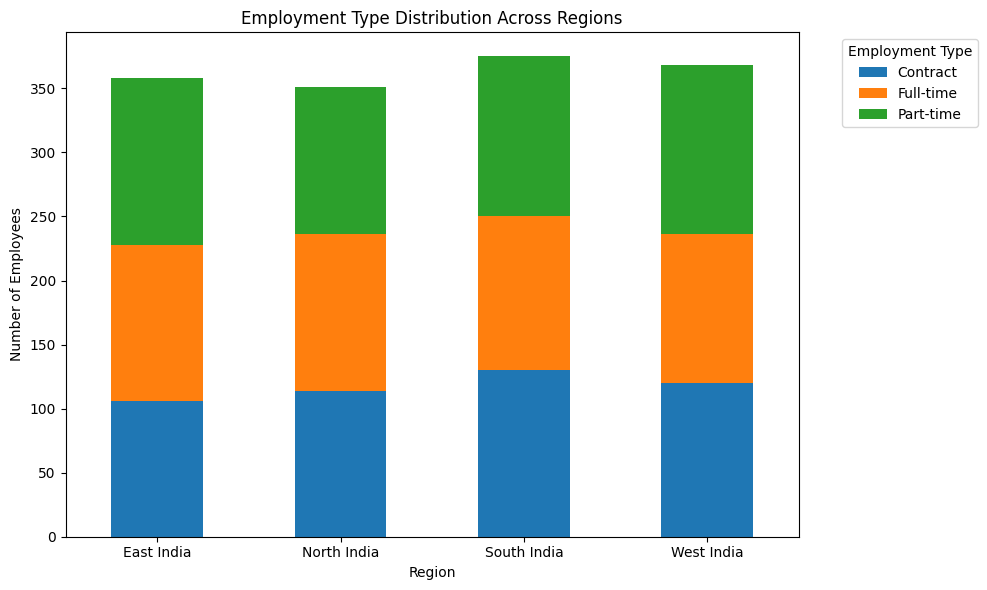

In [31]:
# Ensure required columns are available
required_cols = ['Region', 'Employment Type', 'Employee ID']
if not all(col in df.columns for col in required_cols):
    raise ValueError(f"Missing required columns: {required_cols}")

# Create a pivot table: count of employees by Region and Employment Type
pivot_legal = (
    df.pivot_table(
        index='Region',
        columns='Employment Type',
        values='Employee ID',
        aggfunc='count',
        fill_value=0
    )
    .sort_index()
)

# Plot: Stacked bar chart
pivot_legal.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the chart
plt.title("Employment Type Distribution Across Regions")
plt.xlabel("Region")
plt.ylabel("Number of Employees")
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the chart
plt.show()